In [1]:
!pip install numpy matplotlib scikit-image


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data  # nếu cần ảnh mẫu


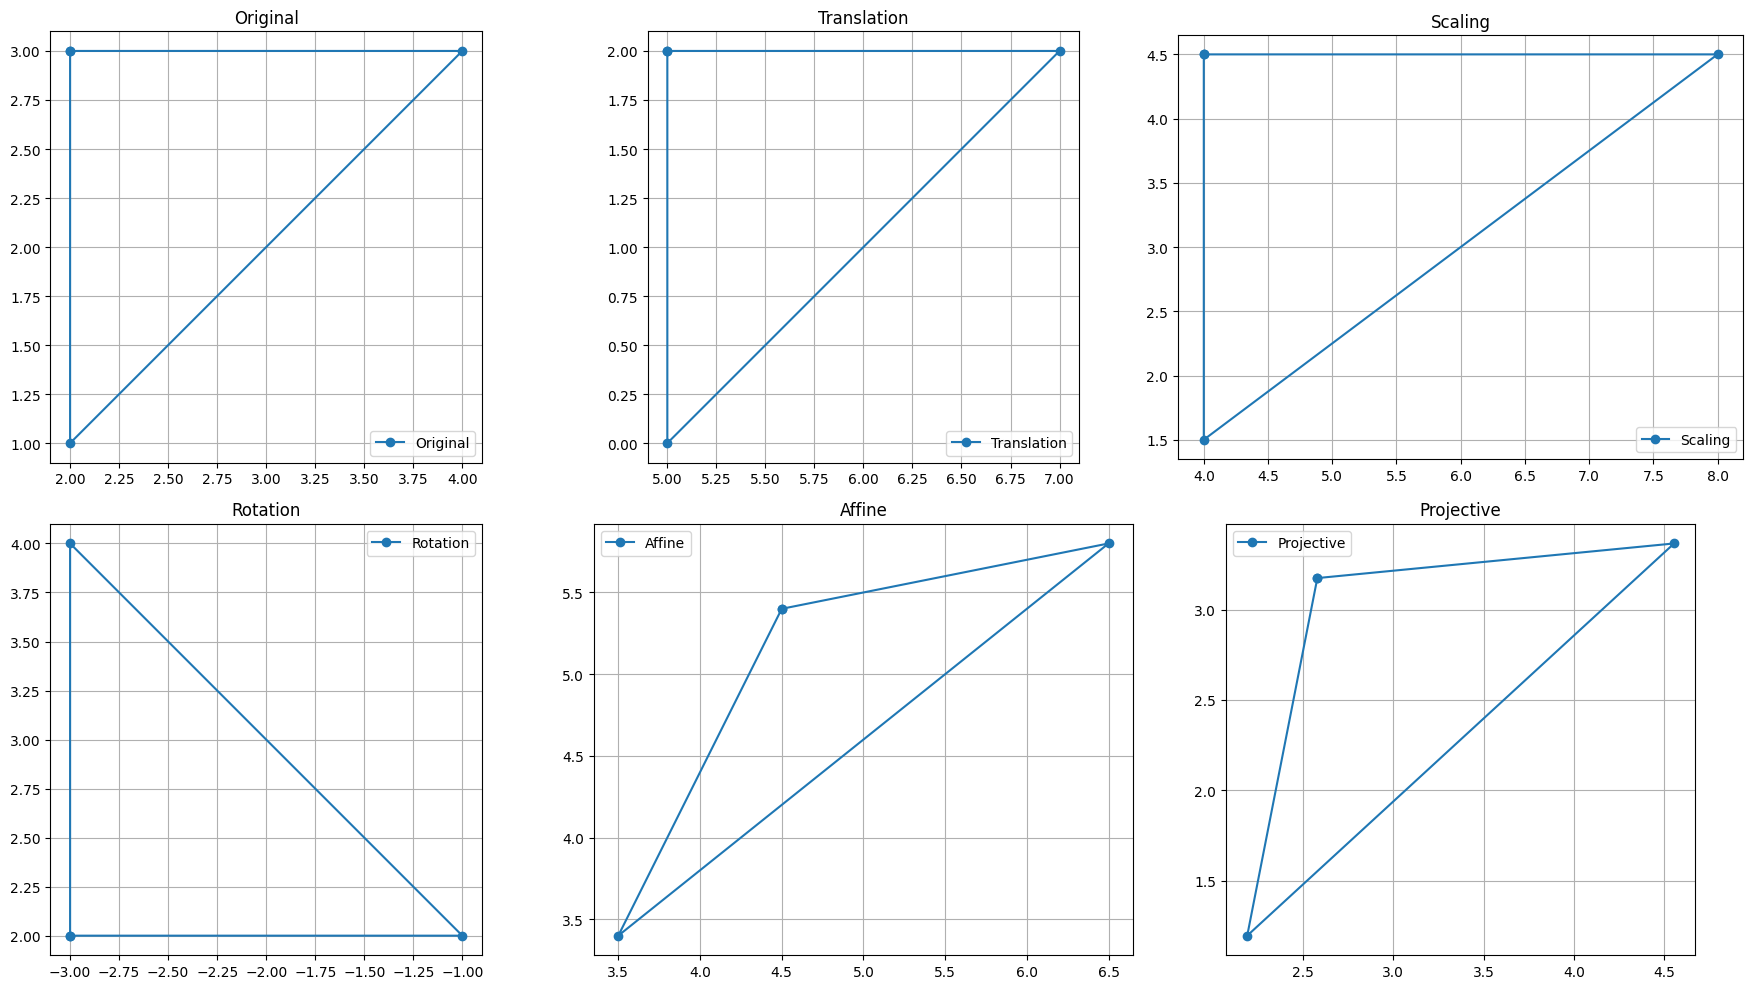

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu điểm tam giác ban đầu (homogeneous coordinates)
G = np.array([
    [2, 3, 1],
    [4, 3, 1],
    [2, 1, 1],
    [2, 3, 1]  # Khép kín
])


def apply_transform(G, M):
    G_transformed = np.zeros_like(G, dtype=np.float64)
    for i in range(G.shape[0]):
        p = M @ G[i, :]
        if p[2] != 0:
            p = p / p[2]  # chuẩn hóa (chỉ cần cho projective)
        G_transformed[i] = p
    return G_transformed


# 1. Translation
tx, ty = 3, -1
T = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])
G_t = apply_transform(G, T)

# 2. Scaling
sx, sy = 2, 1.5
S = np.array([
    [sx, 0,  0],
    [0,  sy, 0],
    [0,  0,  1]
])
G_s = apply_transform(G, S)

# 3. Rotation (90 độ)
theta = np.radians(90)
R = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta),  np.cos(theta), 0],
    [0, 0, 1]
])
G_r = apply_transform(G, R)

# 4. Affine
A = np.array([
    [1, 0.5, 1],
    [0.2, 1, 2],
    [0, 0, 1]
])
G_a = apply_transform(G, A)

# 5. Projective
H = np.array([
    [1, 0.2, 0],
    [0.1, 1, 0],
    [0.001, 0.002, 1]
])
G_p = apply_transform(G, H)

# Vẽ biểu đồ
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
titles = ['Original', 'Translation', 'Scaling',
          'Rotation', 'Affine', 'Projective']
data = [G, G_t, G_s, G_r, G_a, G_p]

for ax, title, points in zip(axes.ravel(), titles, data):
    ax.plot(points[:, 0], points[:, 1], 'o-', label=title)
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


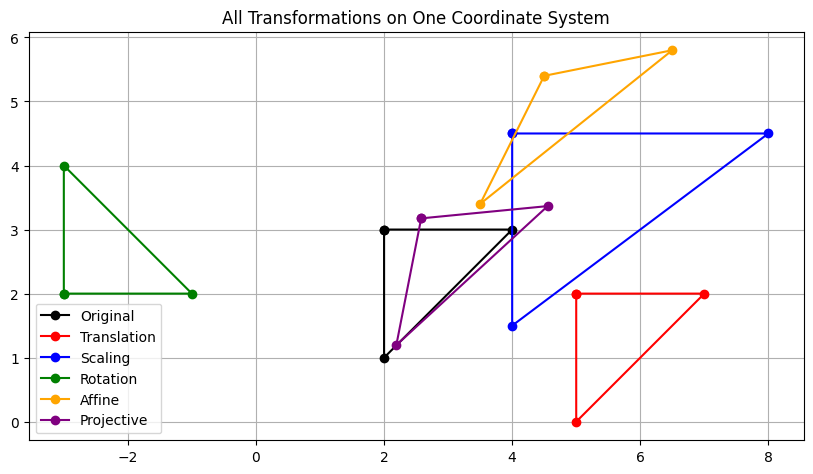

In [ ]:
# Vẽ tất cả các hình trên cùng 1 hệ tọa độ để so sánh trực tiếp
fig, ax = plt.subplots(figsize=(10, 10))

# Danh sách tên và dữ liệu
titles = ['Original', 'Translation', 'Scaling',
          'Rotation', 'Affine', 'Projective']
data = [G, G_t, G_s, G_r, G_a, G_p]
colors = ['black', 'red', 'blue', 'green', 'orange', 'purple']

for points, label, color in zip(data, titles, colors):
    ax.plot(points[:, 0], points[:, 1], 'o-', label=label, color=color)

ax.set_title("All Transformations on One Coordinate System")
ax.set_aspect('equal')
ax.grid(True)
ax.legend()
plt.show()
